In [41]:
import pandas as pd
from fbprophet import Prophet

In [42]:
df=pd.read_csv('BeerWineLiquor.csv')

In [43]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
date    324 non-null object
beer    324 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


In [45]:
df.rename(columns={'date':'ds','beer':'y'},inplace=True)
# prophet library requires in these headers

In [46]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [47]:
df['ds']=pd.to_datetime(df['ds'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
ds    324 non-null datetime64[ns]
y     324 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.1 KB


In [49]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [50]:
m=Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [52]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [53]:
len(df)

324

In [54]:
len(future)

348

In [55]:
forecast=m.predict(future)

In [56]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1773.449803,1152.091539,1473.343617,1773.449803,1773.449803,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,0.0,0.0,0.0,1311.673097
1,1992-02-01,1776.239771,1190.491221,1506.637004,1776.239771,1776.239771,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,0.0,0.0,0.0,1348.648735
2,1992-03-01,1778.849740,1435.336817,1764.802120,1778.849740,1778.849740,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,0.0,0.0,0.0,1599.668420
3,1992-04-01,1781.639707,1422.776772,1740.441398,1781.639707,1781.639707,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,0.0,0.0,0.0,1585.328104
4,1992-05-01,1784.339676,1652.252158,1996.909666,1784.339676,1784.339676,45.026915,45.026915,45.026915,45.026915,45.026915,45.026915,0.0,0.0,0.0,1829.366590


In [57]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.010945,5066.351869,5396.077266,5189.513564,5212.300690,40.218725,40.218725,40.218725,40.218725,40.218725,40.218725,0.0,0.0,0.0,5241.229670
344,2020-09-01,5217.085200,4926.044987,5250.018173,5204.712653,5229.440593,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,0.0,0.0,0.0,5084.201064
345,2020-10-01,5232.640931,5033.548614,5367.110568,5219.160200,5246.020585,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,0.0,0.0,0.0,5189.365538
346,2020-11-01,5248.715186,5170.629794,5499.601862,5234.100654,5263.580734,86.703091,86.703091,86.703091,86.703091,86.703091,86.703091,0.0,0.0,0.0,5335.418277
347,2020-12-01,5264.270916,6160.106573,6507.437676,5248.577887,5280.322830,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,0.0,0.0,0.0,6335.779667


In [58]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [59]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.788552,4468.059699,4791.051772
337,2020-02-01,4679.048478,4514.302289,4850.823325
338,2020-03-01,4942.495400,4773.191432,5094.013723
339,2020-04-01,4941.439371,4774.892234,5096.416850
340,2020-05-01,5198.333619,5041.947869,5362.144701
341,2020-06-01,5179.412285,5025.079275,5347.573575
342,2020-07-01,5311.959526,5142.001470,5486.305002
343,2020-08-01,5241.229670,5066.351869,5396.077266
344,2020-09-01,5084.201064,4926.044987,5250.018173
345,2020-10-01,5189.365538,5033.548614,5367.110568


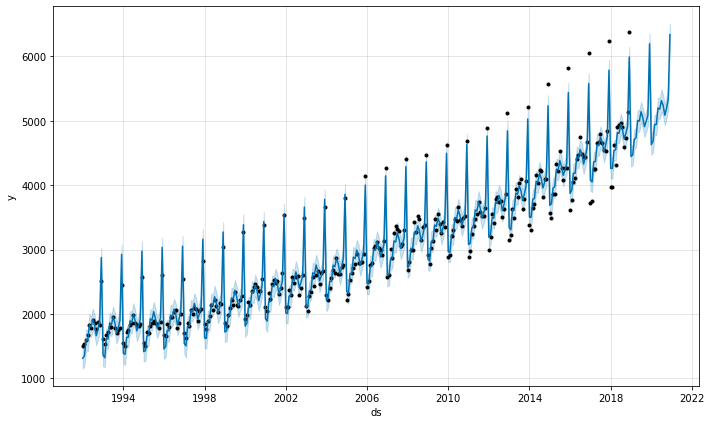

In [60]:
m.plot(forecast);

AttributeError: 'Figure' object has no attribute 'xlim'

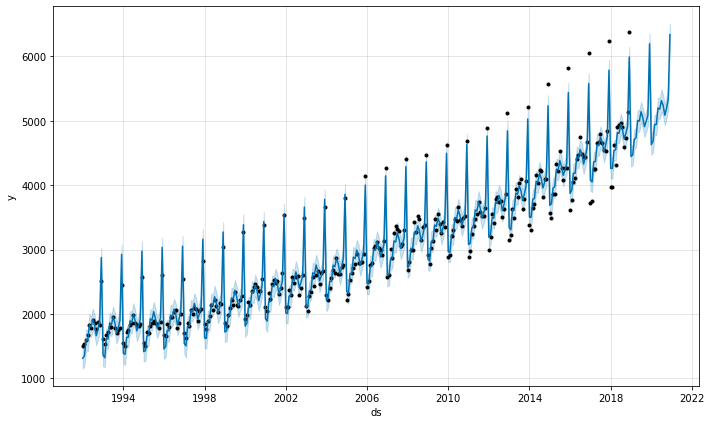

In [63]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

In [ ]:
forecast.plot(x='ds',y='yhat')

In [ ]:
m.plot_components(forecast);
